# Assignment 3 - Normal and t distributions
(20 points)

### Add your name(s) and EIDs below
- Student Name: Siem Yonas
- Student UT EID: sby237
- Partner Name:
- Partner UT EID:

### Grading clarifications
1. Before you submit:
    - **Please do not change the variable names** we give you for your answer to each question. You can use other variables if you wish, but the final answer must be stored in that variable.
    - **Please don't use any other libraries** besides those provided in `requirements.txt`, and those [built in to Python](https://docs.python.org/3.8/library/index.html).
2. We will also be double-checking the autograder, so you won't lose points if your formatting causes it to deduct points (but please try to follow the points under 1).
3. After submitting, you may see "All test cases passed!" for Public Tests. Please note that this doesn't mean you have correctly answered every question, as there are no public tests. We will be using a series of hidden tests to verify your answers are correct.

# Overview
An experiment was conducted to determine the effect of children participating in a given meal preparation on calorie intake for that meal. Data are recorded below. 

Save the data to a format that can be read into Python. Read the data in for analysis. Data is provided in two separted CSV files. 

* Use Python to calculate the quantities and generate the visual summaries requested below. (You will lose points if you are not utilizing Python.)

* You can use the scipy libary to do your tests, or you can implement them from scratch in Python.



In [1]:
# Standard Headers
# You are welcome to add additional headers here if you wish, as long as they are
# built-in or included in requirements.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

# Q1
Summarize the data by whether children participated in the meal preparation or not. Use an appropriately labelled table to show the results. Also include a graphical presentation that shows the distribution of calories for participants vs. non-participants. Describe the shape of each distribution and comment on the similarity (or lack thereof) between the distributions in each population. **(2 points)**

Be aware that there is not one specific way the graph needs to look. Experiment with different types of graphs, and different parameters for the graph type. Your goal is to present the data as readable as possible. 

Both distributions visually seem be to relatively unskewed and have about the same mean. The nonparticipant distribution seems to have a higher standard deviation than the participant distribution, as the histogram is much flatter and spread out.

<!-- BEGIN QUESTION -->



In [2]:
# Add your code or descriptions here
participants = pd.read_csv("participants.csv", header=0, names=["Intake"])
nonparticipants = pd.read_csv("nonparticipants.csv", header=0, names=["Intake"])

full = pd.concat([participants.assign(Type="Participant"), nonparticipants.assign(Type="Nonparticipant")]).reset_index(drop=True)

full.groupby("Type")["Intake"].describe().T

Type,Nonparticipant,Participant
count,22.000000,25.000000
mean,374.071818,410.079600
std,133.139285,121.513786
min,139.690000,210.990000
25%,296.392500,298.380000
50%,374.740000,424.940000
75%,445.557500,456.300000
max,688.770000,635.210000


In [3]:
LOWER = min(participants.Intake.min(), nonparticipants.Intake.min())
UPPER = max(participants.Intake.max(), nonparticipants.Intake.max())

bins = np.linspace(LOWER, UPPER, 15)

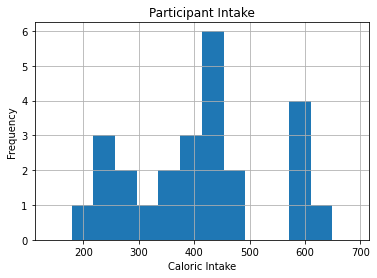

In [4]:
participants.Intake.hist(bins=bins)
plt.ylim((0, 6.25))
plt.title("Participant Intake")
plt.ylabel("Frequency")
_ = plt.xlabel("Caloric Intake")

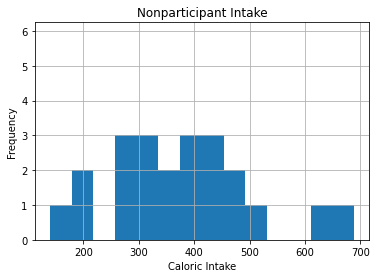

In [5]:
nonparticipants.Intake.hist(bins=bins)
plt.ylim((0, 6.25))
plt.title("Nonparticipant Intake")
plt.ylabel("Frequency")
_ = plt.xlabel("Caloric Intake")

<!-- END QUESTION -->

# Q2

Does the mean calorie consumption for those who participated in the meal preparation differ from **425**? Formally test at the $\alpha = 0.05$ level using the 5 steps outlined in the module. **(6 points - 3 for computations, 3 for description)**


 ### 1.
 $H_0 : \mu = 425$ (the mean calorie consumption for participants is 425 Cal)
 
 $H_1 : \mu \neq 425$ (the mean calorie consumption for participants is not 425 Cal)
 
 $\alpha = 0.05$
 
 ### 2.
 Since n is small and the sd of the population is unknown, use a t-test.
 $$ t = \frac{\bar x - \mu}{SE} $$
 
 ### 3.
 The critical value is obtained from the standard t-distribution associated with the right hand tail probablity of $ \frac{\alpha}{2} = \frac{0.05}{2} = 0.025 $ based on $ df = 24 $ is $ 2.06 $.
 
 Decision Rule: Reject $ H_0 $ if $ |t| \geq 2.06 $, otherwise, fail to reject $H_0$
 
 ### 4.
 $ t = -0.614 $ (see cell two below)
 
 ### 5.
 
 Fail to reject $H_0$, since $|-0.614| < 2.06$
 We do not have significant evidence at the $\alpha = 0.05$ level that the mean calorie consumption of the program participants differs from 425.
 
 Values: 
 $$
 t = -0.614 \\
 pvalue = 0.545 
 $$
 

In [6]:
# df for t test is n-1
df = len(participants.Intake)-1

# critical value is abs(t.ppf(alpha/2, df))
# What is the critical value?
q2_cr = abs(stats.t.ppf(0.025, df))
q2_cr 

2.063898561628021

In [7]:
result = stats.ttest_1samp(participants.Intake, 425)

# What is the test statistic and its associated p-value?
q2_t = result.statistic
q2_p = result.pvalue

print('t-value:', q2_t)
print('p-value:', q2_p)

t-value: -0.6139385690489593
p-value: 0.54503195103188


<!-- END QUESTION -->

# Q3
Calculate a **90%** confidence interval for the mean calorie intake for participants in the meal preparation. Interpret the confidence interval. **(6 points - 3 for computations, 3 for description)**

90% Confidence Interval: $\mu \in (368.5, 451.7)$ 

We are 90% confident that the mean calorie intake for the participants of the program in between 368.5 and 451.7.

<!-- BEGIN QUESTION -->



In [8]:
result = stats.t.interval(0.90, df, loc=participants.Intake.mean(), scale=participants.Intake.std()/ np.sqrt(len(participants.Intake)))

#print(participants.Intake.mean() - abs(stats.t.ppf(0.05, df)) * participants.Intake.std() / np.sqrt(len(participants.Intake)))

ci_lower = result[0]
ci_upper = result[1]
print("confidence interval: ( ", ci_lower, ci_upper, ")")

confidence interval: (  368.50044815647897 451.658751843521 )


<!-- END QUESTION -->

# Q4
Formally test whether or not participants consumed 
more calories than non-participants at the $\alpha = 0.05$ level using the 5 steps procedure for hypothesis tests. **(6 points - 3 for computations, 3 for description)**

 ### 1.
 $H_0 : \mu_{part} = \mu_{nonpart}$ (the mean calorie consumption doesn't depend on participation)
 
 $H_1 : \mu_{part} > \mu_{nonpart}$ (the mean calorie consumption is greater for participants than nonparticipants)
 
 $\alpha = 0.05$
 
 ### 2.
 Since n is small and the sd of the population is unknown, use a t-test.
 
 ### 3.
 The critical value is obtained from the standard t-distribution associated with the right hand tail probablity of $ \alpha = 0.05 $ based on $ df = 42.9 (\approx 42) $ is $ 1.68 $.
 
 Decision Rule: Reject $ H_0 $ if $ |t| \geq 1.68 $, otherwise, fail to reject $H_0$
 
 ### 4.
 $ t = 0.969 $ (see cell two below)
 
 ### 5.
 
 Fail to reject $H_0$, since $|0.969| < 1.68$
 We do not have significant evidence at the $\alpha = 0.05$ level that the mean calorie consumption of the program is greater for meal program participants.
 
 Values: 
 $$
 t = 0.969 \\
 pvalue = 0.169
 $$

In [9]:
n1, n2 = len(participants.Intake), len(nonparticipants.Intake)
s1, s2 = participants.Intake.std(), nonparticipants.Intake.std()

df = (s1**2/n1 + s2**2/n2)**2 / ((s1**2/n1)**2/(n1-1) + (s2**2/n2)**2/(n2-1))

# Compute the critical value 
q4_cr = abs(stats.t.ppf(0.05, df))
q4_cr

1.6811563281306157

In [10]:
result = stats.ttest_ind(participants.Intake, nonparticipants.Intake, alternative = 'greater')

# Compute the test statistic and its p-value
q4_statistic = result.statistic
q4_p = result.pvalue
print("statistic:", q4_statistic)
print("p-value:", q4_p)

statistic: 0.9693504409241457
p-value: 0.1687759109713235


<!-- END QUESTION -->

